In [1325]:
# Import libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import sklearn
from sklearn import metrics 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import scipy.stats
from scipy.stats import shapiro

# need to find out how to use XGBoost

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [1326]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/merged_sentiment_copy.csv'
df_uk_full = pd.read_csv(url)  

df_uk_full

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
0,01-12-89,2661.760010,803.789978,14.713333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,01-01-90,2591.129883,783.250000,14.630000,5.7,1165.829956,725.320007,NaN,NaN,-19.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
2,01-02-90,2463.879883,746.010010,14.546667,5.9,1121.469971,700.580017,NaN,NaN,-24.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
3,01-03-90,2437.370117,741.700012,14.463333,6.0,1115.699951,701.400024,NaN,NaN,-35.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
4,01-04-90,2285.780029,701.510010,14.380000,6.4,1044.619995,660.010010,NaN,NaN,-31.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,01-12-24,20622.605250,18346.656780,4.666667,2.5,4510.612374,9911.349295,97.599004,202.318,-17.0,76.436604,258.074,70.333738,1158.944,4.4,6.0,0.1,NaN
425,01-01-25,20950.482850,18672.852080,4.583333,3.0,4760.296255,10468.532720,97.964750,203.450,-22.0,77.157249,260.303,70.983754,1169.039,4.4,5.6,0.1,NaN
426,01-02-25,20326.383590,18140.063380,4.500000,2.8,4808.022992,10614.288820,97.931114,204.230,-20.0,77.946072,262.794,71.900830,1181.575,4.4,5.6,0.1,NaN
427,01-03-25,19475.479520,17424.441290,4.500000,2.6,4675.031137,10374.199300,98.206564,204.810,-19.0,76.341361,258.271,69.708409,1153.159,4.4,5.6,0.1,NaN


In [1327]:
df_uk_full.describe()

,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
count,429.000000,429.000000,429.000000,428.000000,428.000000,428.000000,327.000000,327.000000,428.000000,327.000000,327.000000,345.000000,345.000000,428.000000,293.000000,429.000000,294.000000
mean,10618.089403,7088.524507,3.895254,2.741589,2898.553707,4074.876157,102.199686,165.608471,-12.196262,116.558976,233.210150,119.766901,1072.605623,6.202804,3.380546,0.498368,0.071241
std,6486.845572,5765.988797,3.433704,2.147064,963.999754,2551.074231,2.019057,28.512795,12.157390,16.419084,91.571367,20.393053,495.807034,1.857170,1.960185,2.497648,0.162852
min,1974.040039,618.229981,0.175000,-0.100000,968.719971,626.700012,96.086395,100.000000,-49.000000,74.537811,100.000000,69.708409,343.756000,3.600000,-2.900000,-20.300000,-0.485326
25%,4811.399902,2127.800049,0.426966,1.500000,2181.337488,2134.199993,101.393485,141.963000,-21.000000,108.945661,149.728500,108.732895,636.799000,4.800000,2.000000,0.300000,-0.000799
50%,9306.890000,5232.980000,4.500000,2.200000,2996.230000,3465.360000,102.760895,181.923000,-10.000000,117.472840,244.103000,119.794840,943.254000,5.500000,3.200000,0.500000,0.062303
75%,17168.343780,12172.659480,5.730000,3.000000,3666.856365,5929.765691,103.605045,186.355000,-3.000000,126.876200,299.265500,133.330400,1412.945000,7.800000,4.700000,0.800000,0.176186
max,24102.191970,19395.493530,14.713333,11.100000,4808.022992,10614.288820,105.672380,206.139000,10.000000,152.680969,423.925000,168.403976,2192.415000,10.700000,8.900000,16.800000,0.514315


In [1328]:
df_uk_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     429 non-null    object 
 1   ftse_250_price                           429 non-null    float64
 2   ftse_250_total_return                    429 non-null    float64
 3   base_rate                                429 non-null    float64
 4   CPI                                      428 non-null    float64
 5   ftse_350_Price                           428 non-null    float64
 6   ftse_350_Total Return (Gross, Unhedged)  428 non-null    float64
 7   price_02_Price                           327 non-null    float64
 8   price_02_Total Return (Gross, Unhedged)  327 non-null    float64
 9   confidence_score                         428 non-null    float64
 10  price_05_Price                           327 non-n

In [1329]:
# Convert date to datetime
df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)

#Check if the data types are right 
df_uk_full.dtypes

C:\Users\justi\AppData\Local\Temp\ipykernel_40764\3670151657.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)


Date                                       datetime64[ns]
ftse_250_price                                    float64
ftse_250_total_return                             float64
base_rate                                         float64
CPI                                               float64
ftse_350_Price                                    float64
ftse_350_Total Return (Gross, Unhedged)           float64
price_02_Price                                    float64
price_02_Total Return (Gross, Unhedged)           float64
confidence_score                                  float64
price_05_Price                                    float64
price_05_Total Return (Gross, Unhedged)           float64
price_10_Price                                    float64
price_10_Total Return (Gross, Unhedged)           float64
unemployment_rate                                 float64
wage_growth_rate                                  float64
gdp_GDP                                           float64
polarity_score

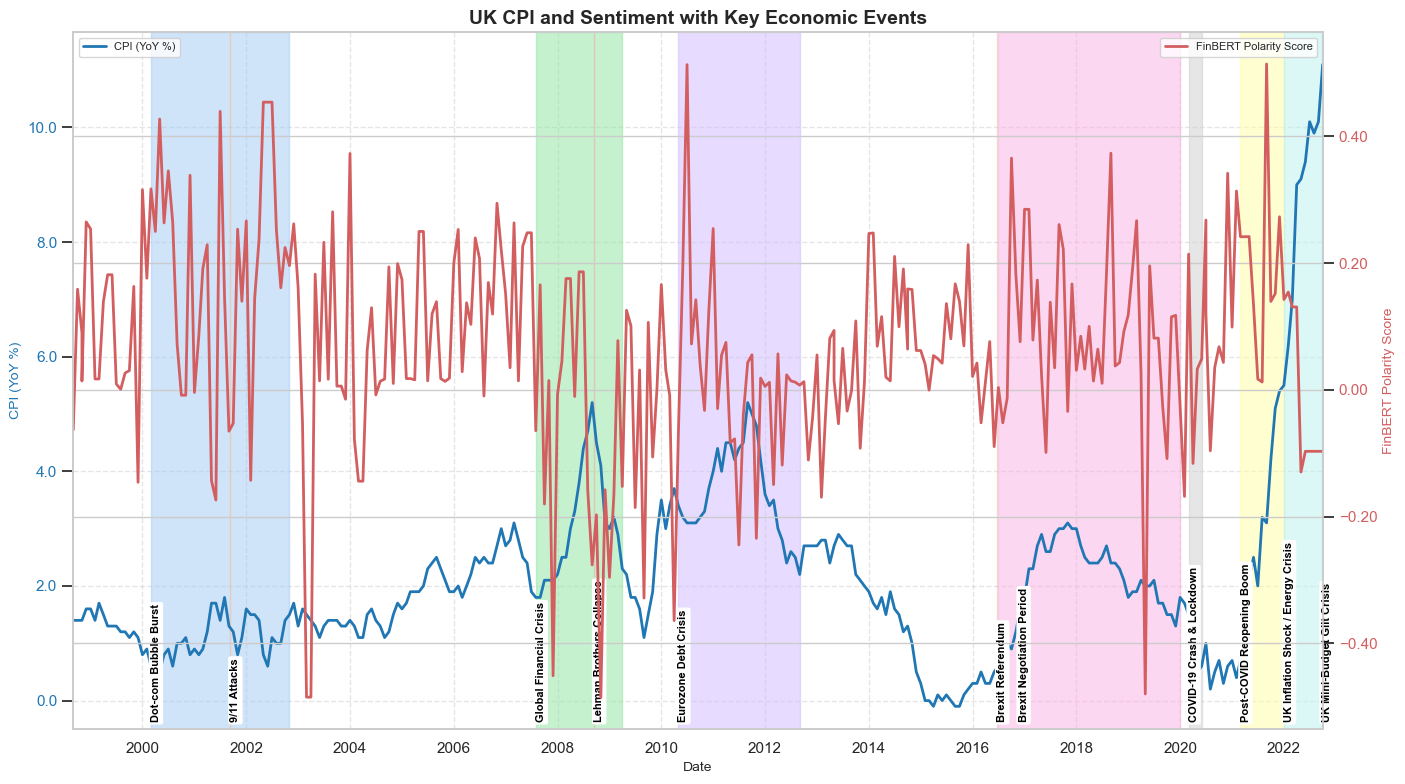

In [1330]:
# Filter data from 1 Sep 1998 onwards
start_date = pd.to_datetime('1998-09-01')
df_plot = df_uk_full[df_uk_full['Date'] >= start_date].copy()
df_plot = df_plot.dropna(subset=['CPI', 'polarity_score_finbert'])

# Define the key economic events dictionary
events = {
    'Early 1990s Recession (UK)': {'Start': '1990-07-01', 'End': '1992-09-30'},
    'Black Wednesday (ERM Crisis)': {'Start': '1992-09-16', 'End': '1992-09-16'},
    'BoE Operational Independence': {'Start': '1997-05-06', 'End': '1997-05-06'},
    'Dot-com Bubble Burst': {'Start': '2000-03-01', 'End': '2002-10-31'},
    '9/11 Attacks': {'Start': '2001-09-11', 'End': '2001-09-11'},
    'Global Financial Crisis (GFC)': {'Start': '2007-08-01', 'End': '2009-03-31'},
    'Lehman Brothers Collapse': {'Start': '2008-09-15', 'End': '2008-09-15'},
    'Eurozone Debt Crisis': {'Start': '2010-05-01', 'End': '2012-08-31'},
    'Brexit Referendum': {'Start': '2016-06-23', 'End': '2016-06-23'},
    'Brexit Negotiation Period': {'Start': '2016-07-01', 'End': '2019-12-31'},
    'COVID-19 Crash & Lockdown': {'Start': '2020-03-01', 'End': '2020-05-31'},
    'Post-COVID Reopening Boom': {'Start': '2021-03-01', 'End': '2021-12-31'},
    'UK Inflation Shock / Energy Crisis': {'Start': '2022-01-01', 'End': '2022-12-31'},
    'UK Mini-Budget Gilt Crisis': {'Start': '2022-09-23', 'End': '2022-10-14'}
}

# Apply a Seaborn style
sns.set_style('whitegrid')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# --- CPI Plot ---
color_cpi = '#2077b4'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('CPI (YoY %)', color=color_cpi, fontsize=10)
ax1.plot(df_plot['Date'], df_plot['CPI'], color=color_cpi, label='CPI (YoY %)', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_cpi, size=8)

# --- Sentiment Score Plot ---
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot['Date'], df_plot['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# --- Event Shading and Labels ---
# Use a Seaborn palette for event colors
event_colors = sns.color_palette('pastel', n_colors=len(events)).as_hex()
label_y_offset = 0.01
label_fontsize = 8
i = 0

label_positions = {}
brexit_referendum_end = pd.to_datetime(events['Brexit Referendum']['End'])
label_positions['Brexit Referendum'] = brexit_referendum_end
label_positions['Brexit Negotiation Period'] = brexit_referendum_end + pd.Timedelta(days=150)

# Set the y position for the labels to be at the bottom of the chart (y=0)
event_y_position = 0

for event_name, dates in events.items():
    start = pd.to_datetime(dates['Start'])
    end = pd.to_datetime(dates['End'])

    if end >= start_date:
        display_start = max(start, start_date)
        ax1.axvspan(display_start, end, color=event_colors[i % len(event_colors)], alpha=0.5)
        label_x_pos = label_positions.get(event_name, display_start)

        # Add labels just above the x-axis using axes coordinates
        ax1.text(label_x_pos, 0.01,
                 event_name.split('(')[0].strip(),
                 rotation=90,
                 fontsize=label_fontsize,
                 color='black',
                 fontweight='bold',
                 ha='left',
                 va='bottom',
                 transform=ax1.get_xaxis_transform(),
                 zorder=5,
                 bbox=dict(
                 facecolor='white',     # background color
                 alpha=1,              # opacity (0 = transparent, 1 = solid)
                 edgecolor='none',       # remove border
                 boxstyle='round,pad=0.2'  # optional rounded corners
                 ))

        i += 1

# --- Title and Layout ---
plt.title('UK CPI and Sentiment with Key Economic Events', fontsize=14, fontweight='bold')
fig.tight_layout()

# --- X-Axis Formatting ---
ax1.xaxis.set_major_locator(mdates.YearLocator(2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# --- Y-Axis Formatting ---
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# --- Legends ---
ax1.legend(loc='upper left', fontsize=8)
ax2.legend(loc='upper right', fontsize=8)

# --- Grid and Limits ---
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot['Date'].max())
ax1.set_ylim(bottom=-0.5)  # Ensure the y-axis starts at 0

plt.show()

### Visual analysis shows that CPI Y-o-Y percentage change tends to move inversely to the finBERT sentiment scores. Also significant movements in both CPI and sentiment scores tend to take place where there are key economic events which directly impact on the UK economy (e.g. the Global Financial Crisis, Eurozone Debt Crisis, Brexit and Covid-19.

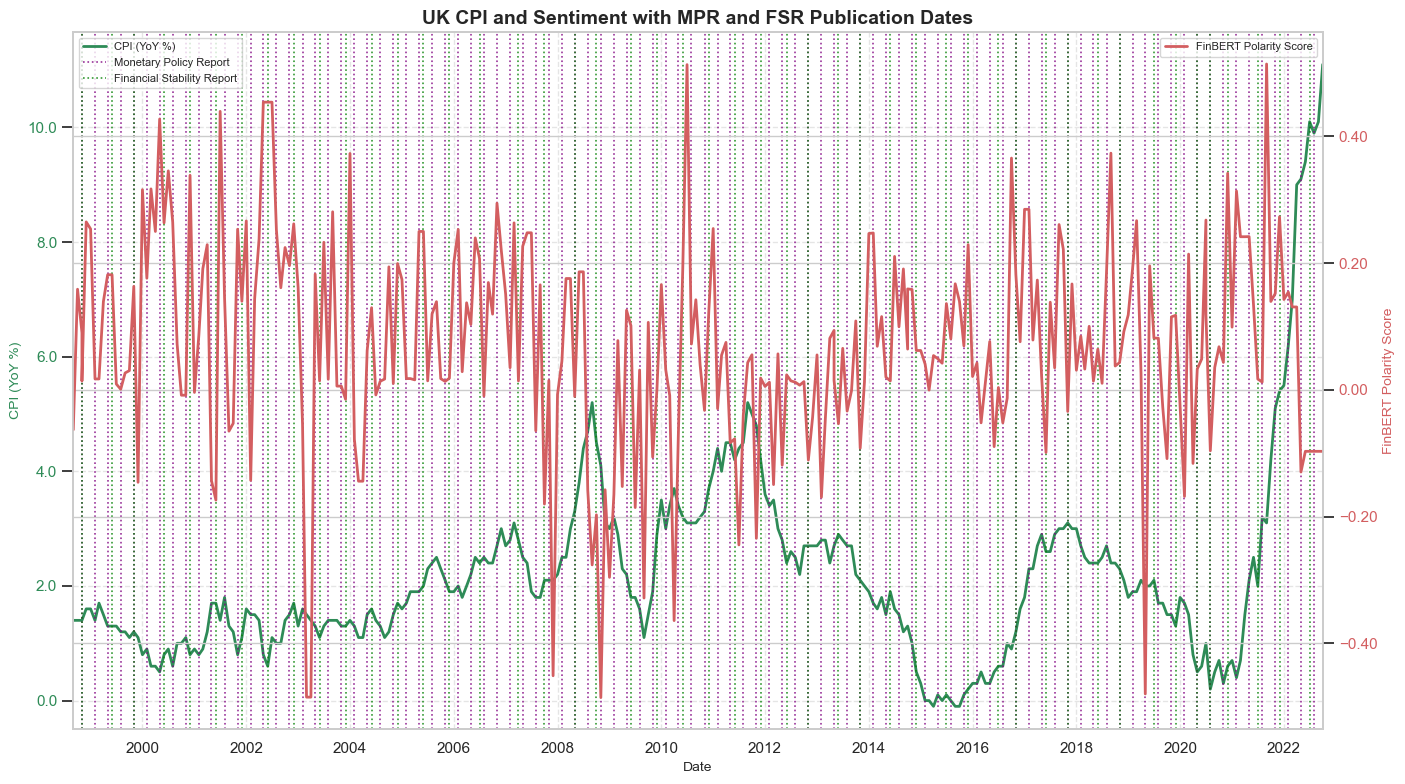

In [1332]:
start_date = pd.to_datetime('1998-09-01')
df_plot2 = df_uk_full[df_uk_full['Date'] >= start_date].copy()
df_plot2 = df_plot2.dropna(subset=['CPI', 'polarity_score_finbert'])

# --- Load Publication Dates from repo ---
mpr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/mpr_dates_cleaned.csv'
fsr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/fsr_dates_cleaned.csv'

mpr_dates = pd.read_csv(mpr_url, parse_dates=["date"])
fsr_dates = pd.read_csv(fsr_url, parse_dates=["date"])

# --- Apply Style ---
sns.set_style('whitegrid')

# --- Plot Setup ---
fig, ax1 = plt.subplots(figsize=(14, 8))

# CPI Line (Left Axis)
color_cpi = '#2E8B57'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('CPI (YoY %)', color=color_cpi, fontsize=10)
ax1.plot(df_plot2['Date'], df_plot2['CPI'], color=color_cpi, label='CPI (YoY %)', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_cpi, size=8)

# Sentiment Line (Right Axis)
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot2['Date'], df_plot2['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# --- NEW: Add MPR and FSR Vertical Lines ---

# MPR: Purple Dotted Lines
for date in mpr_dates['date']:
    ax1.axvline(x=date, color='purple', linestyle=':', linewidth=1.2, alpha=0.8, label='Monetary Policy Report')

# FSR: Green Dotted Lines
for date in fsr_dates['date']:
    ax1.axvline(x=date, color='green', linestyle=':', linewidth=1.2, alpha=0.8, label='Financial Stability Report')

# --- Title and Layout ---
plt.title('UK CPI and Sentiment with MPR and FSR Publication Dates', fontsize=14, fontweight='bold')
fig.tight_layout()

# --- X-Axis Formatting ---
ax1.xaxis.set_major_locator(mdates.YearLocator(2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# --- Y-Axis Formatting ---
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# --- Deduplicated Legend ---
handles, labels = ax1.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax1.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', fontsize=8)

# --- Legend for FinBERT on Right Axis ---
handles2, labels2 = ax2.get_legend_handles_labels()
unique_labels2 = dict(zip(labels2, handles2))
ax2.legend(unique_labels2.values(), unique_labels2.keys(), loc='upper right', fontsize=8)

# --- Grid and Limits ---
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot['Date'].max())
ax1.set_ylim(bottom=-0.5)

plt.show()

### Drop unncessary columns to reduce the number of variables to be explored

In [1334]:
# Drop unnecessary columns. Alters the original "df_uk" dataframe to reflected dropped columns
df_uk_focused = df_uk_full.drop(['ftse_250_price', 'ftse_350_Price','ftse_350_Total Return (Gross, Unhedged)','price_02_Price', 'price_05_Price','price_05_Total Return (Gross, Unhedged)','price_10_Price','price_10_Total Return (Gross, Unhedged)'], axis=1)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'base_rate', 'CPI',
       'price_02_Total Return (Gross, Unhedged)', 'confidence_score',
       'unemployment_rate', 'wage_growth_rate', 'gdp_GDP',
       'polarity_score_finbert'],
      dtype='object')

### Rename columns

In [1336]:
# Rename the column headers.
df_uk_focused.rename(columns={
    'base_rate': 'BoE_base_rate',
    'CPI': 'CPI_pct_change',
    'gdp_GDP': 'GDP_pct_change',
    'price_02_Total Return (Gross, Unhedged)': '0-2yr_gilts_TReturns',
    'polarity_score_finbert':'finbert_sentiment_score'
}, inplace=True)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'BoE_base_rate', 'CPI_pct_change',
       '0-2yr_gilts_TReturns', 'confidence_score', 'unemployment_rate',
       'wage_growth_rate', 'GDP_pct_change', 'finbert_sentiment_score'],
      dtype='object')

In [1337]:
# Define the new order of the columns
new_column_order = [
    'Date', 'CPI_pct_change', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Reindex the DataFrame with the new column order
df_uk_focused = df_uk_focused[new_column_order]

df_uk_focused.head()

,Date,CPI_pct_change,finbert_sentiment_score,confidence_score,unemployment_rate,wage_growth_rate,GDP_pct_change,ftse_250_total_return,BoE_base_rate,0-2yr_gilts_TReturns
0,1989-12-01,NaN,NaN,NaN,NaN,NaN,0.5,803.789978,14.713333,NaN
1,1990-01-01,5.7,NaN,-19.0,6.9,NaN,0.5,783.250000,14.630000,NaN
2,1990-02-01,5.9,NaN,-24.0,6.9,NaN,0.5,746.010010,14.546667,NaN
3,1990-03-01,6.0,NaN,-35.0,6.9,NaN,0.7,741.700012,14.463333,NaN
4,1990-04-01,6.4,NaN,-31.0,6.9,NaN,0.7,701.510010,14.380000,NaN


# Correlation analysis

### Create pairplot for visual correlation analysis

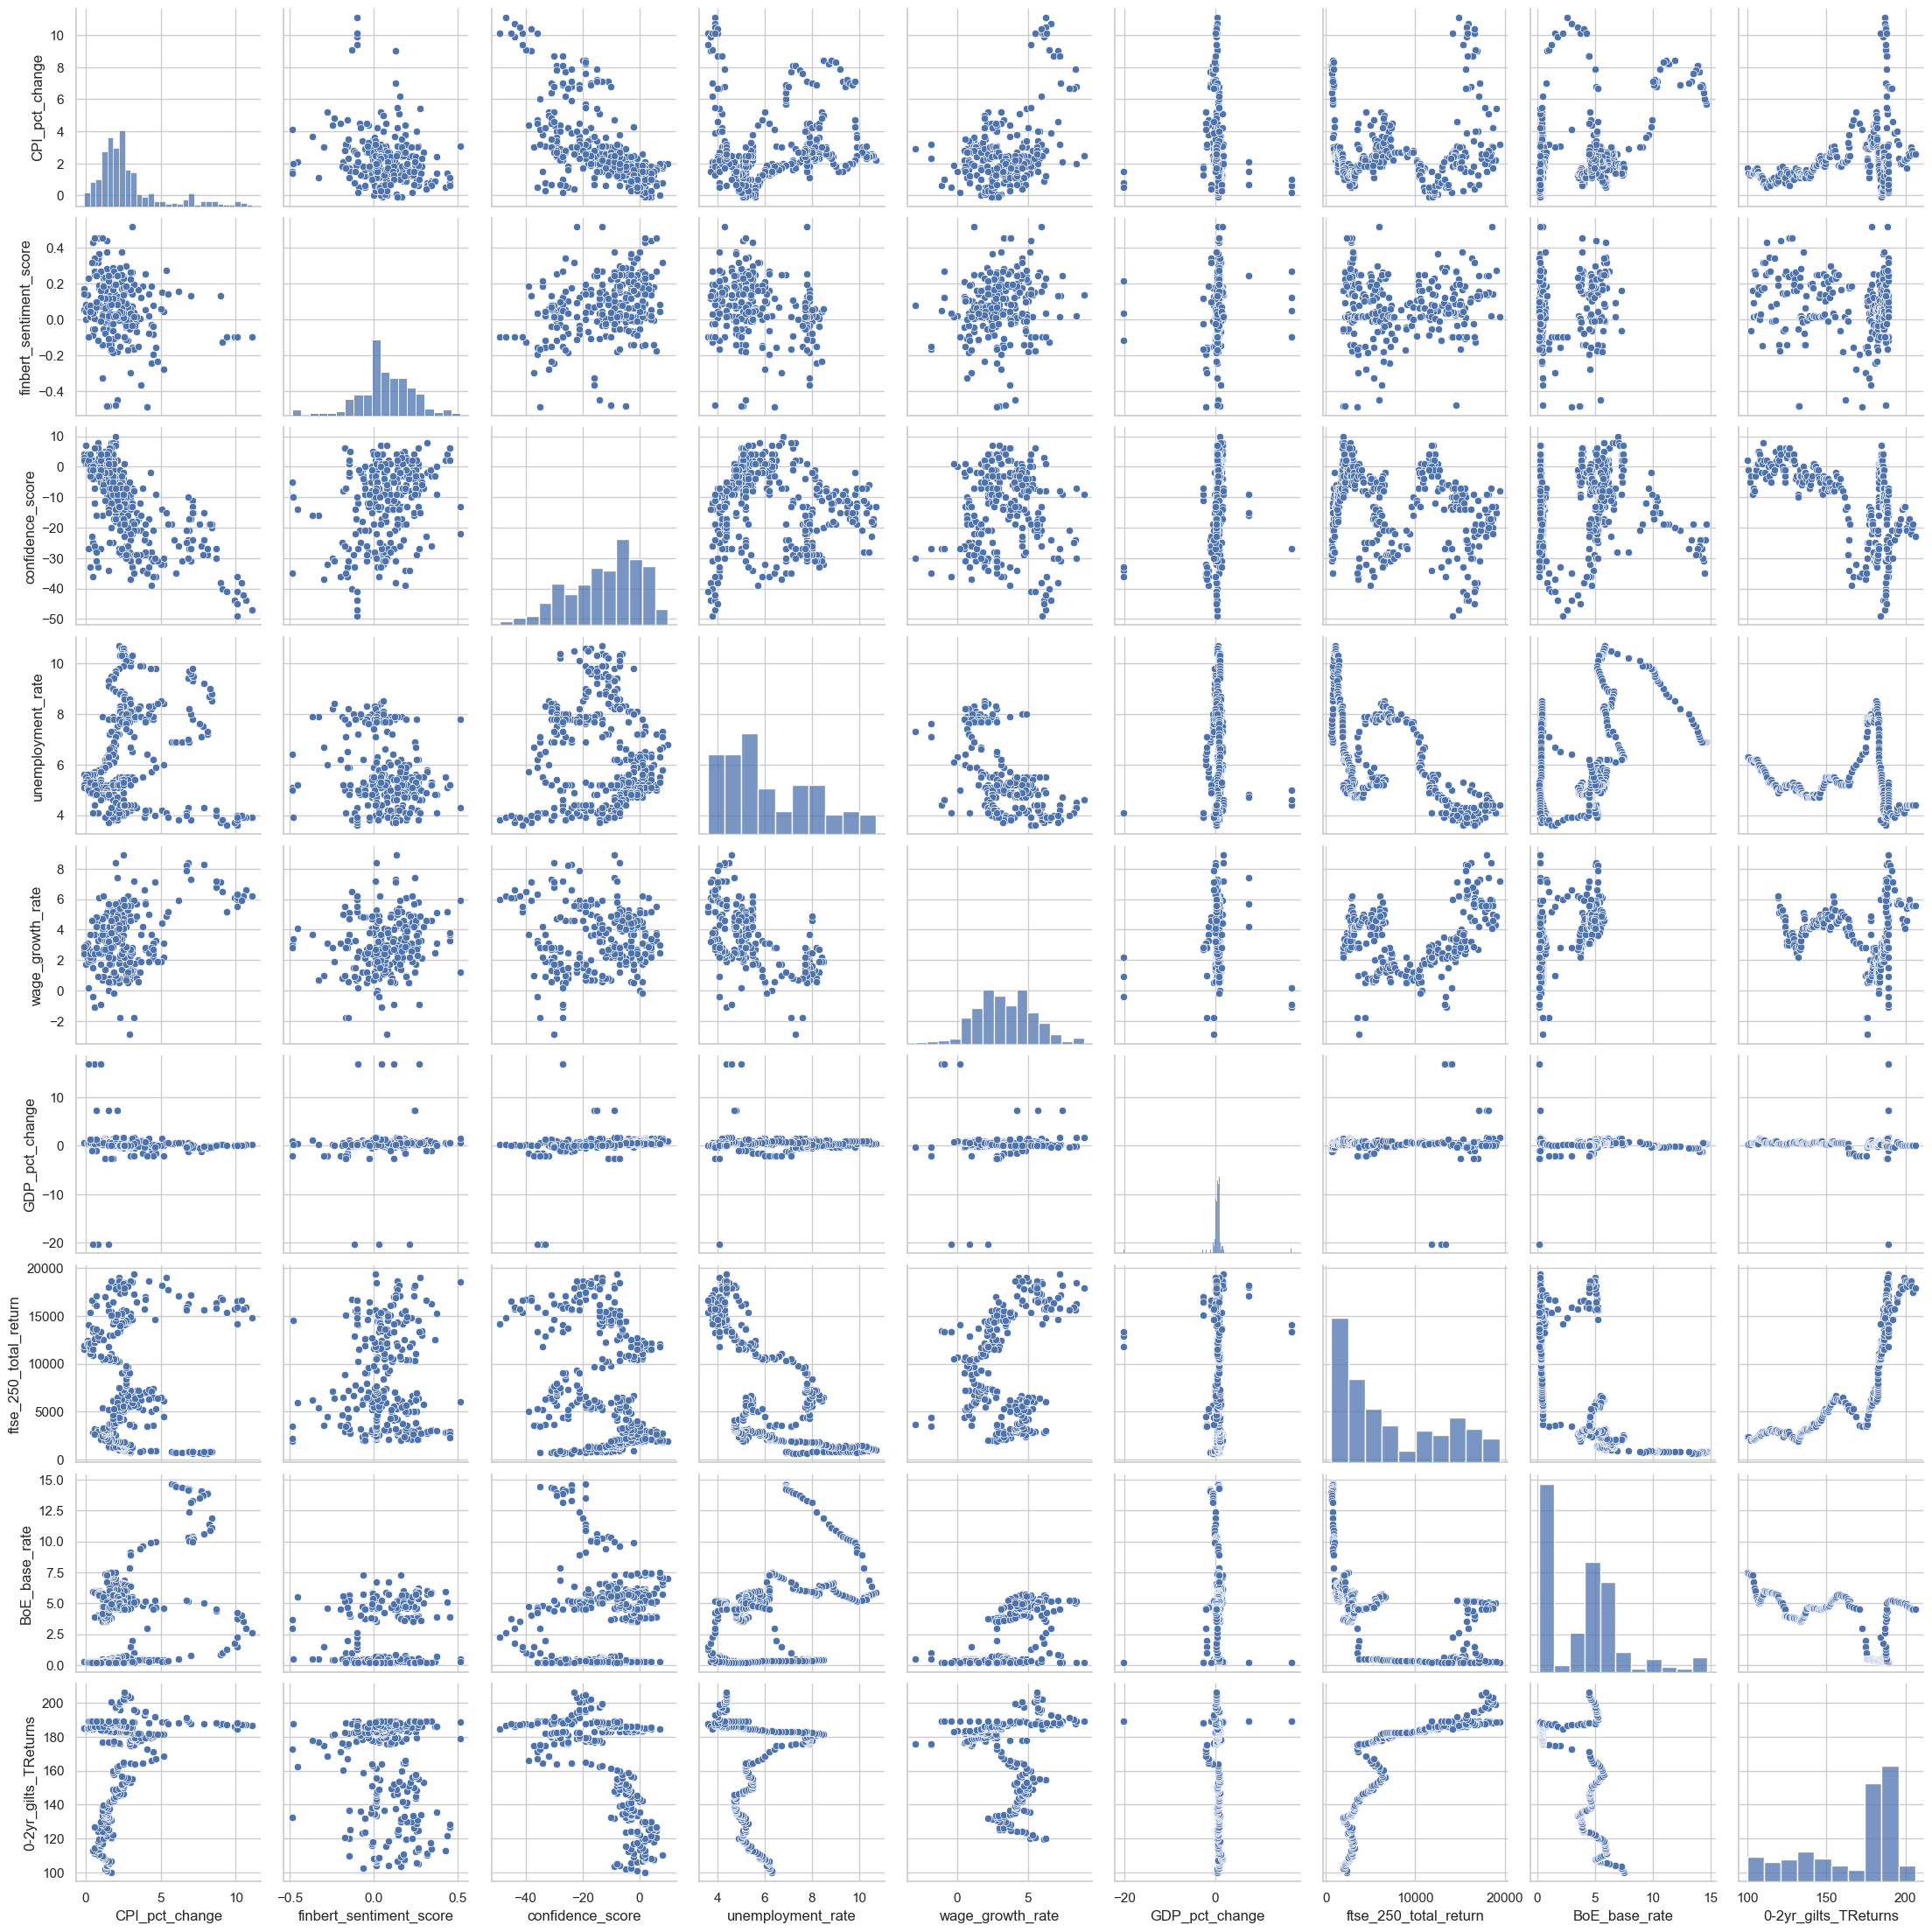

In [1340]:
# Visualise the dataframe to pick out any direct relationships or specific distribution characteristics
sns.pairplot(df_uk_focused)

### Create correlation matrices

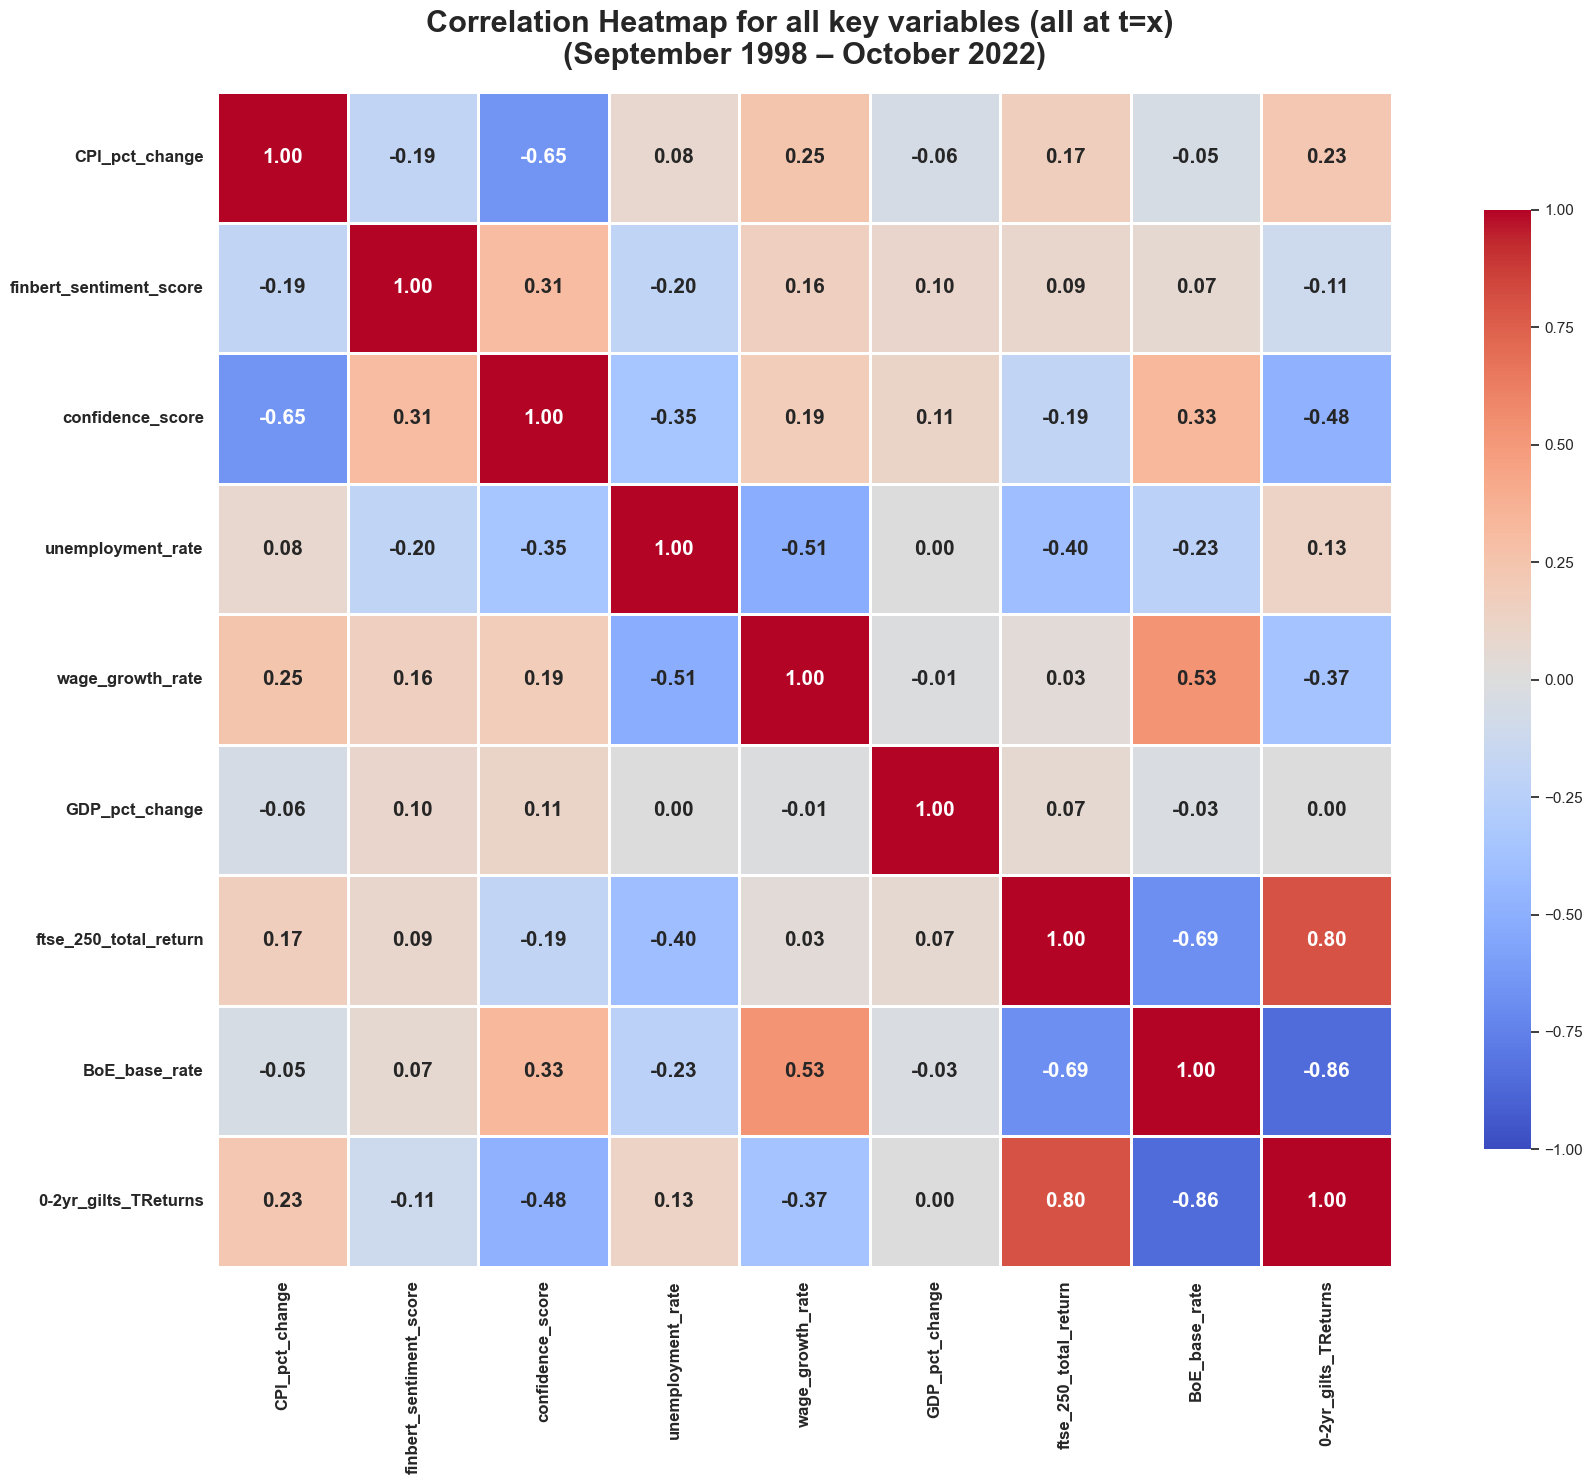

In [1342]:
# Ensure 'Date' column is datetime
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'])
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], format='%d-%m-%y', errors='coerce')

# Filter the DataFrame to 09/1998 – 10/2022
start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)]

# Select only numeric columns and drop rows with missing values
numeric_data = filtered_df.select_dtypes(include='number').dropna()

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 15, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)

plt.title('Correlation Heatmap for all key variables (all at t=x) \n(September 1998 – October 2022)', 
          fontsize=22, fontweight='bold', pad=20)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

plt.show()

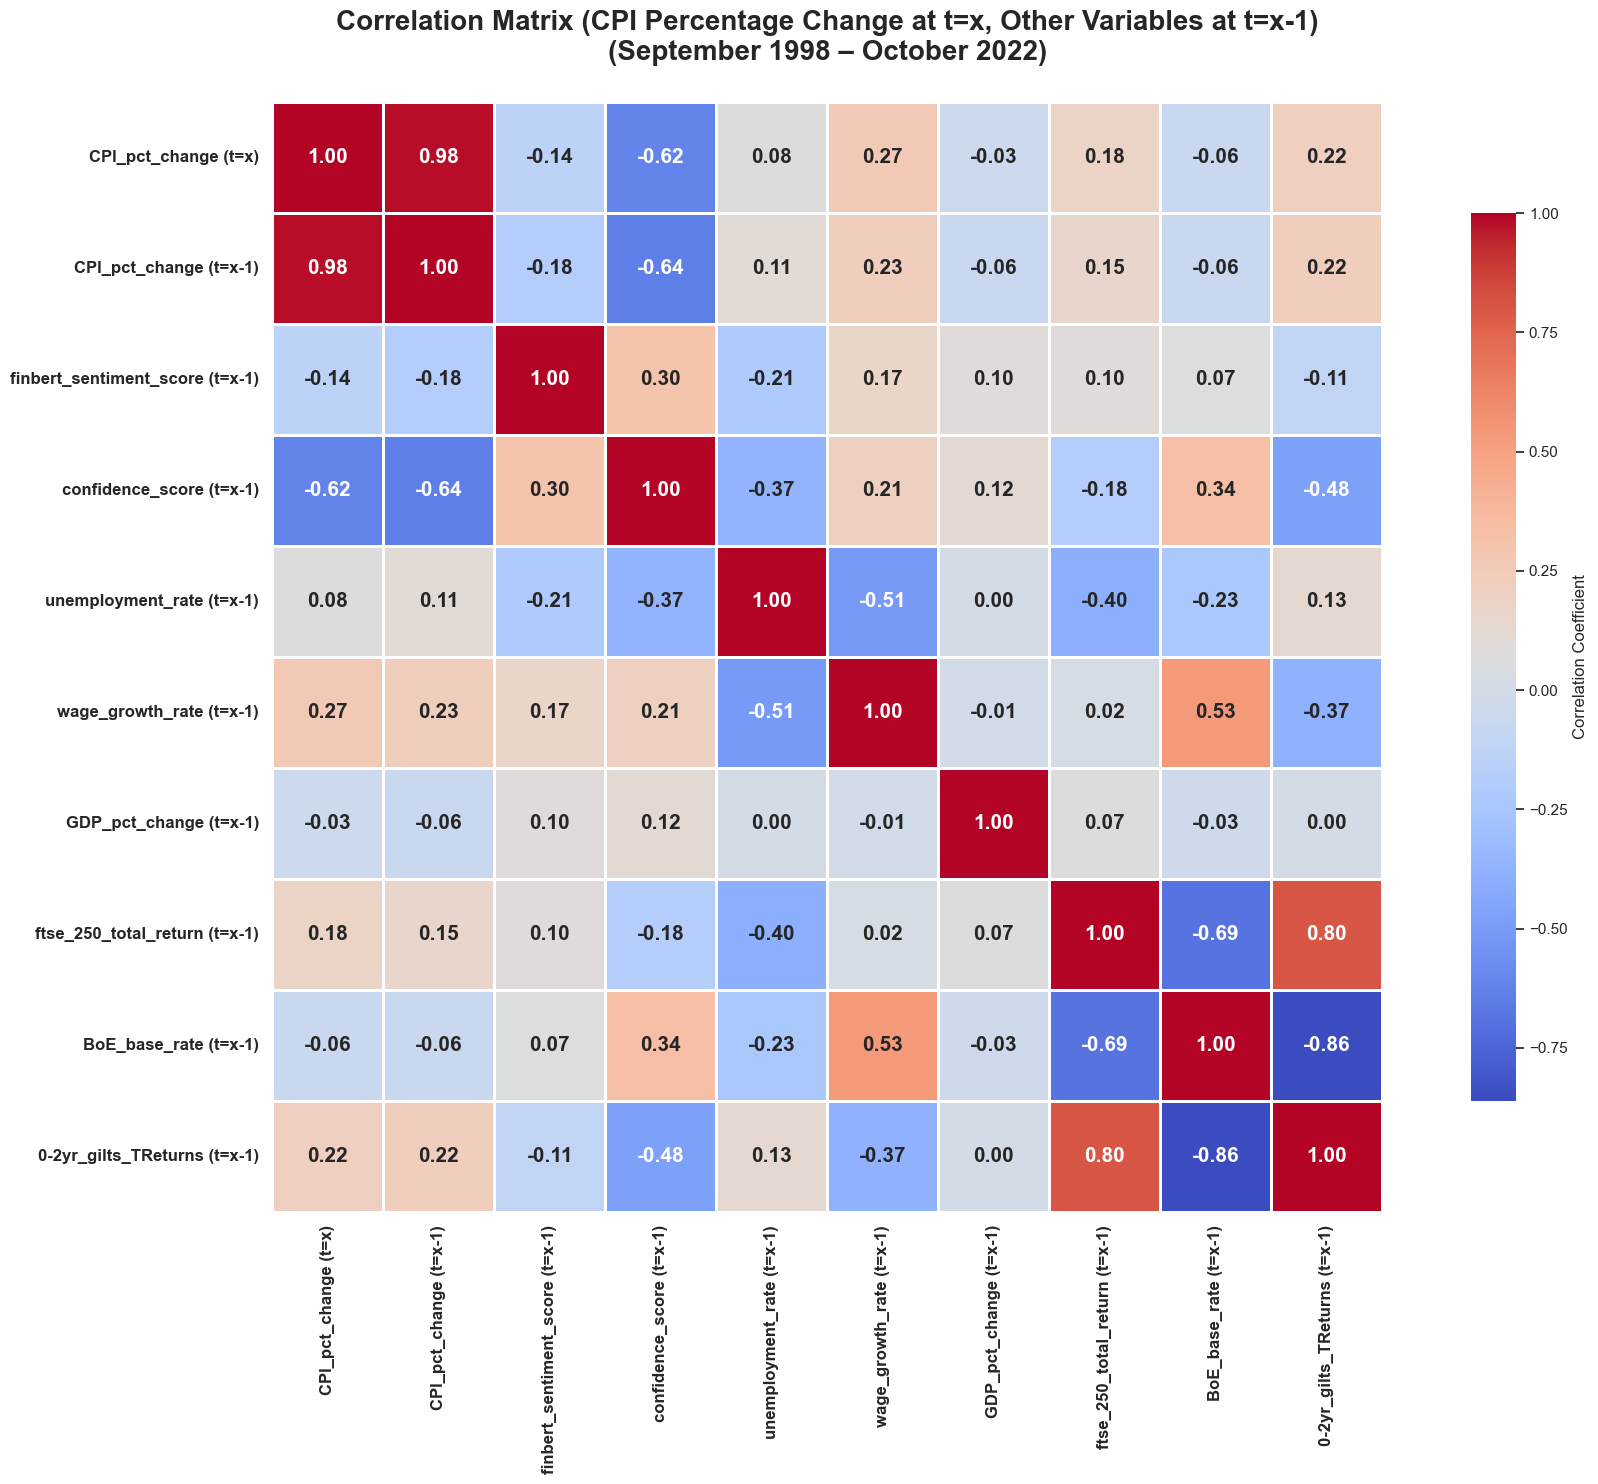

In [1343]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# from September 1998 to October 2022
start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'CPI_pct_change', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['CPI_pct_change']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'CPI_pct_change': 'CPI_pct_change (t=x)'}, inplace=True)

# Add t+1 (1 month lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-1)"] = filtered_df[col].shift(1)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (CPI Percentage Change at t=x, Other Variables at t=x-1)\n(September 1998 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


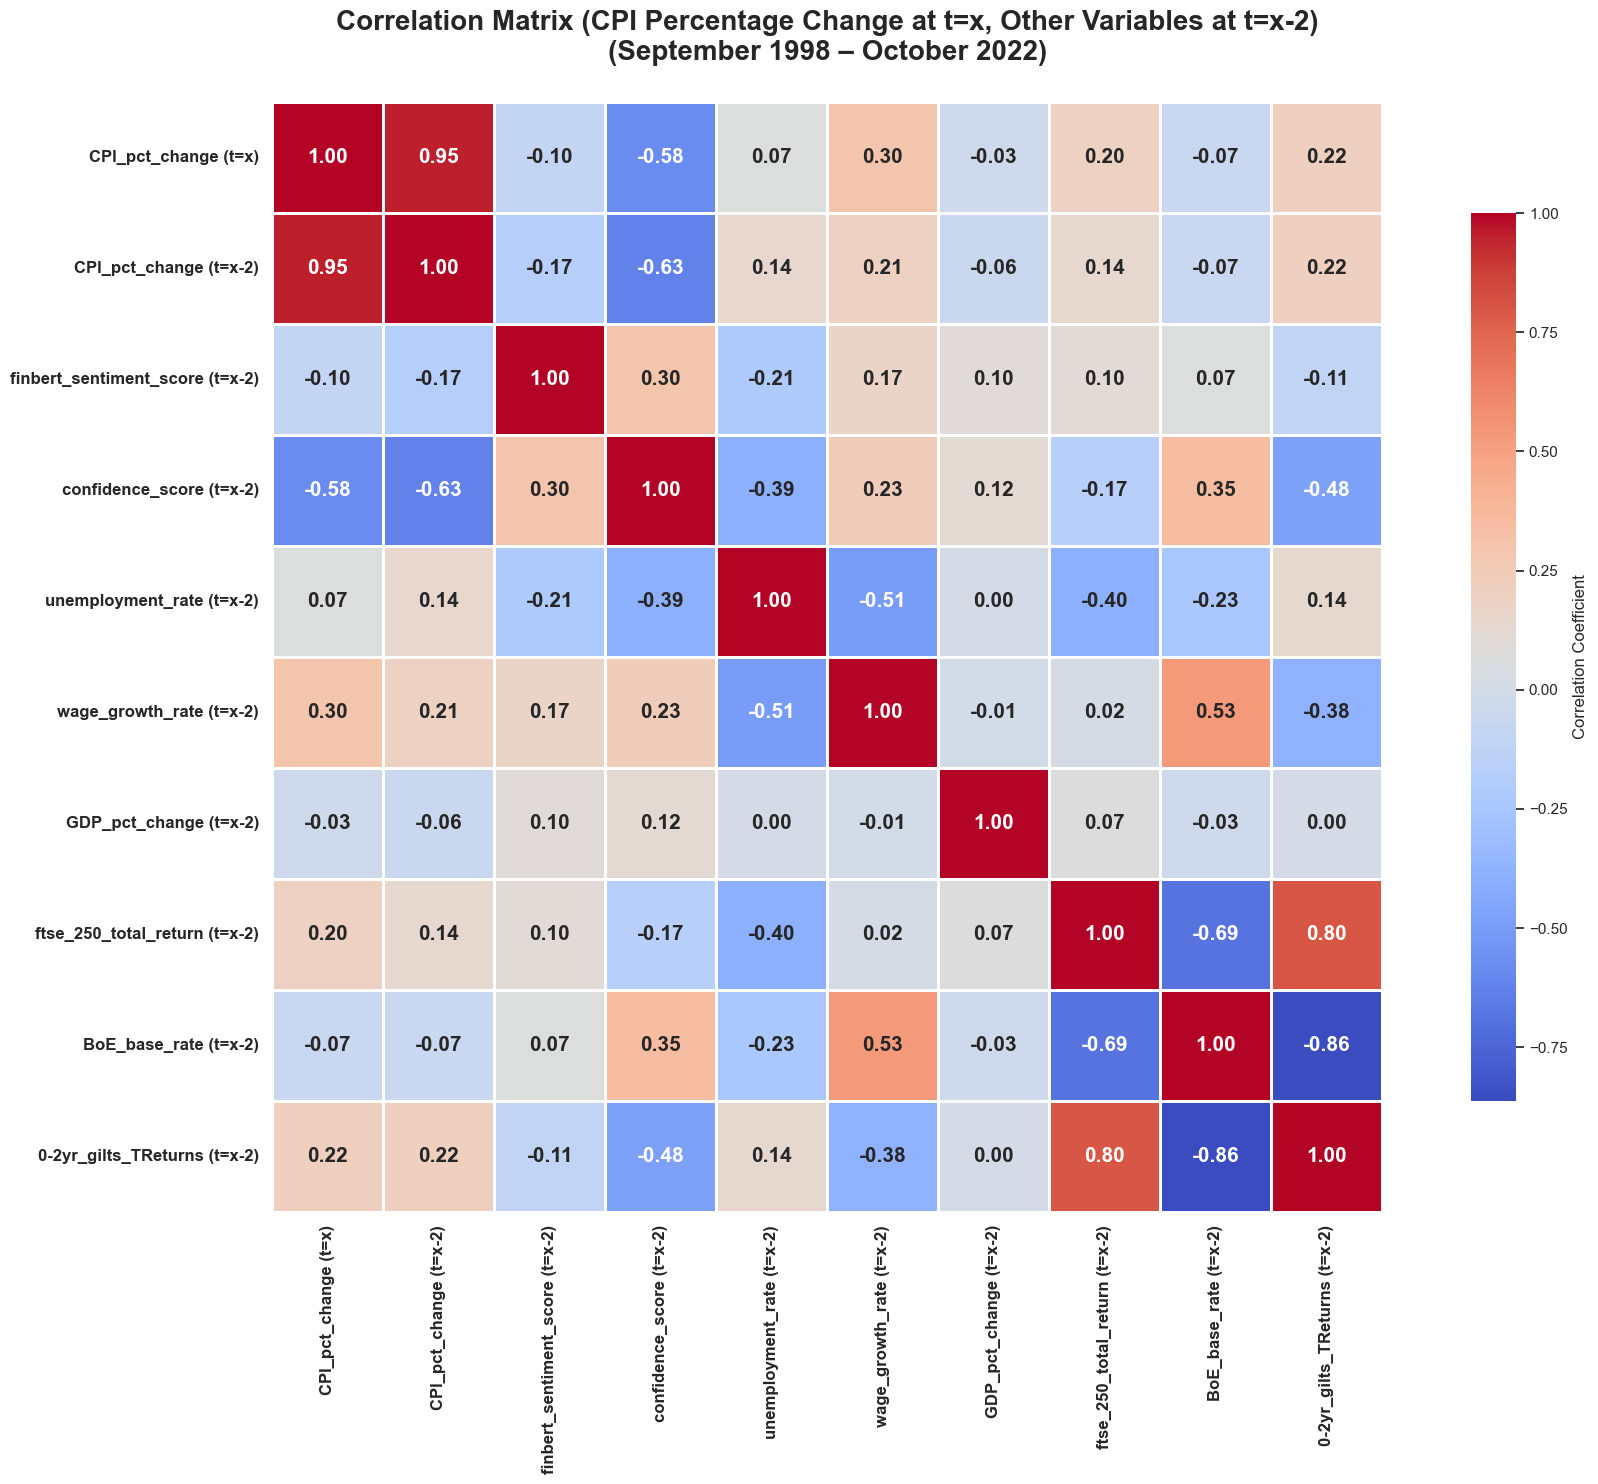

In [1344]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# from September 1998 to October 2022
start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'CPI_pct_change', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['CPI_pct_change']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'CPI_pct_change': 'CPI_pct_change (t=x)'}, inplace=True)

# Add t+2 (2 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-2)"] = filtered_df[col].shift(2)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (CPI Percentage Change at t=x, Other Variables at t=x-2)\n(September 1998 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

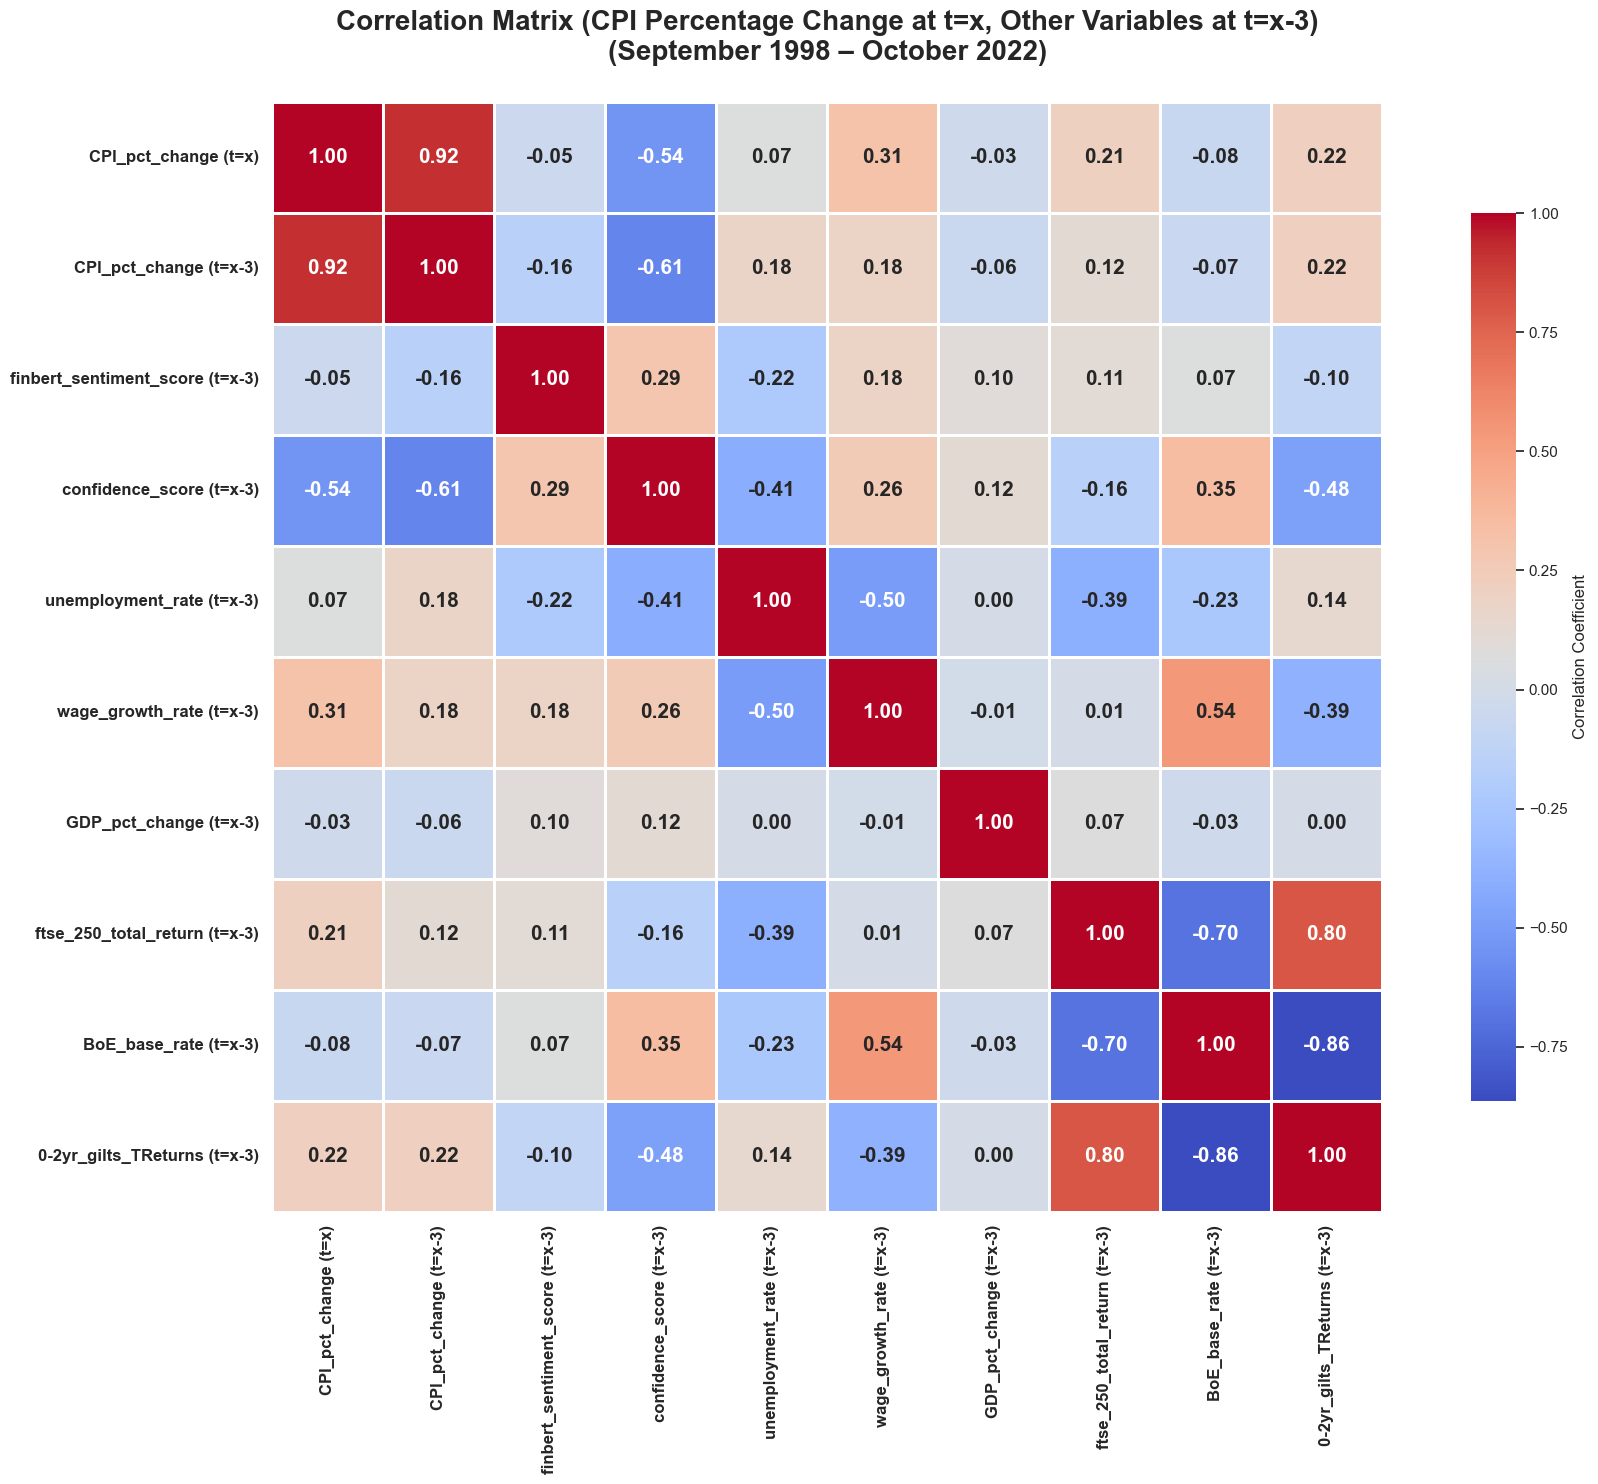

In [1345]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# from September 1998 to October 2022
start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'CPI_pct_change', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['CPI_pct_change']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'CPI_pct_change': 'CPI_pct_change (t=x)'}, inplace=True)

# Add t+3 (3 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-3)"] = filtered_df[col].shift(3)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (CPI Percentage Change at t=x, Other Variables at t=x-3)\n(September 1998 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


### From the above matrices, the variables that best correlate with CPI_pct_change at t=0 are CPI_pct_change (t-1), confidence_score (t=0), wage_growth (t-3), ftse_250_total_returns (t-3) and BoE_base_rate (t-3)

### Therefore these will be used for an initial Multiple Linear Regression analysis to assess predictive ability

# Multiple linear regression: Inflation vs Lagged Inflation, Consumer Confidence Score, Wage Growth and FTSE250 Total Returns

### Prepare regression dataframe

In [1349]:
# Step 1: Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Step 2: Create new DataFrame for regression
regression_df = pd.DataFrame()
regression_df['Date'] = filtered_df['Date']  
regression_df['CPI_pct_change (t=x)'] = filtered_df['CPI_pct_change']
regression_df['CPI_pct_change (t=x-1)'] = filtered_df['CPI_pct_change'].shift(1)
regression_df['confidence_score (t=x)'] = filtered_df['confidence_score']
regression_df['wage_growth_rate (t=x-3)'] = filtered_df['wage_growth_rate'].shift(3)
regression_df['ftse_250_total_return (t=x-3)'] = filtered_df['ftse_250_total_return'].shift(3)
regression_df['BoE_base_rate (t=x-3)'] = filtered_df['BoE_base_rate'].shift(3)

# Step 3: Drop rows with missing values due to shifting
regression_df.dropna(inplace=True)

# Step 4: View correlation or run regression
correlation_matrix = regression_df.drop(columns='Date').corr()
display(correlation_matrix)

,CPI_pct_change (t=x),CPI_pct_change (t=x-1),confidence_score (t=x),wage_growth_rate (t=x-3),ftse_250_total_return (t=x-3),BoE_base_rate (t=x-3)
CPI_pct_change (t=x),1.000000,0.980489,-0.653015,0.313174,0.208102,-0.075366
CPI_pct_change (t=x-1),0.980489,1.000000,-0.670033,0.279665,0.179268,-0.070178
confidence_score (t=x),-0.653015,-0.670033,1.000000,0.135960,-0.207704,0.290681
wage_growth_rate (t=x-3),0.313174,0.279665,0.135960,1.000000,0.007793,0.535372
ftse_250_total_return (t=x-3),0.208102,0.179268,-0.207704,0.007793,1.000000,-0.695253
BoE_base_rate (t=x-3),-0.075366,-0.070178,0.290681,0.535372,-0.695253,1.000000


In [1350]:
# Define the dependent variable
y = regression_df['CPI_pct_change (t=x)']

# Define the independent variable(s)
X = regression_df[
    ['CPI_pct_change (t=x-1)', 'confidence_score (t=x)', 'wage_growth_rate (t=x-3)', 'ftse_250_total_return (t=x-3)','BoE_base_rate (t=x-3)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [1351]:
# Call the predictions for X (array).
mlr.predict(X)

array([ 1.77162841e+00,  1.78707705e+00,  1.43135998e+00,  1.86047804e+00,
        1.35373157e+00,  1.25856511e+00,  8.27040759e-01,  1.11685004e+00,
        1.61838292e+00,  1.49738406e+00,  1.46860588e+00,  1.32470584e+00,
        7.15103729e-01,  5.25659426e-01,  1.04392301e+00,  9.65759625e-01,
        9.78414485e-01,  1.36164774e+00,  1.46110156e+00,  1.63862534e+00,
        1.24838206e+00,  1.53602483e+00,  1.40459406e+00,  1.28082224e+00,
        1.22026719e+00,  1.03452147e+00,  1.26069157e+00,  1.32188225e+00,
        1.32407322e+00,  1.34331487e+00,  1.26618642e+00,  1.28018985e+00,
        1.39606400e+00,  1.31012701e+00,  1.17372291e+00,  1.15862173e+00,
        1.54593977e+00,  1.57400385e+00,  1.40364362e+00,  1.30910411e+00,
        1.09698859e+00,  1.18865580e+00,  1.48608764e+00,  1.68331909e+00,
        1.58723553e+00,  1.69258445e+00,  1.88848056e+00,  1.91832404e+00,
        1.91664217e+00,  2.01796588e+00,  2.30509675e+00,  2.42157753e+00,
        2.53595615e+00,  

In [1352]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.9645467683614382
Intercept:  -0.17317650253434325
Coefficients:


[('CPI_pct_change (t=x-1)', 0.9957293416457909),
 ('confidence_score (t=x)', -0.0023270920220700487),
 ('wage_growth_rate (t=x-3)', 0.06684484158232568),
 ('ftse_250_total_return (t=x-3)', 4.400182989508675e-06),
 ('BoE_base_rate (t=x-3)', -0.02738834475790985)]

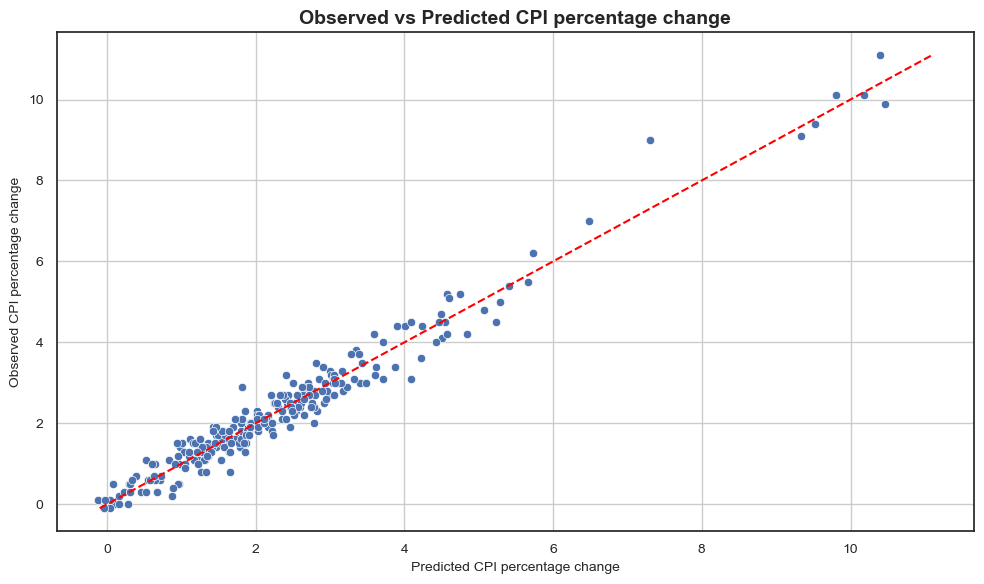

In [1353]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['CPI_pct_change (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted CPI percentage change', fontsize=10)
plt.ylabel('Observed CPI percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted CPI percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

#### Excellent correlation between the predicted and observed CPI percentage change. This indicates that the model is capturing the overall direction of the relationship.

#### Below 6% CPI change, the data points are tightly clustered around the red line, which suggests that the model is accurate in predicting CPI percentage changes. Beyond 6%, the clustering around the red line is less tight and shows a mix of overprediction and under prediction.

### Training and testing subsets with MLR

In [1356]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [1357]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model1.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model1.summary()

# Print the summary.
print(print_model)  

                             OLS Regression Results                             
Dep. Variable:     CPI_pct_change (t=x)   R-squared:                       0.965
Model:                              OLS   Adj. R-squared:                  0.964
Method:                   Least Squares   F-statistic:                     1117.
Date:                  Fri, 16 May 2025   Prob (F-statistic):          4.96e-145
Time:                          10:24:11   Log-Likelihood:                -66.896
No. Observations:                   208   AIC:                             145.8
Df Residuals:                       202   BIC:                             165.8
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

### <span style="color: orange;"> R-square of 96.5% i.e. when applied to the training data set, 96.5% of the variance in CPI_pct_change (t=0) is explained by the independent variables. This is a high R-squared value, suggesting a good fit of the model to the data. 

### <span style="color: orange;"> Adj. R-squared of 96.4% is the same as the R-squared, which is expected with a large number of observations and a relatively small number of predictors. It also indicates a strong model fit.

### <span style="color: orange;"> p-values of all coefficients also indicate that the intercept and CPI_pct_change (t-1) and wage_growth_rate (t-3) have a statistical significant impact on CPI percentage change (all <0.05).

### <span style="color: orange;"> Durbin-Watson test score is close to 2, which suggests little to no autocorreleation in the residuals.

### <span style="color: orange;"> Jarque-Bera (JB) of 59.605 and associated p-value of <5% are indicators for the non-normality of the residuals i.e. we do  have strong evidence to reject the null hypothesis of normally distributed residuals. To check on histogram or Q-Q plot.

### <span style="color: orange;"> Condition number is of 4.06e+04 is very high, suggesting multicollinearity. To check for multicollinearity measuring the VIF (Variance Inflation Factor) in later steps

In [1359]:
# Run regression on the training subset
# Specify the model
mlr = LinearRegression()  

# Fit the model.
mlr.fit(x_train, y_train)

LinearRegression()

In [1360]:
# Call the predictions for X in the train set.
y_pred_train = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train)) 

Prediction for test set: [ 2.25025147  3.58490577  0.94296531  1.92824926  5.06503408  2.49193667
  1.9347664   2.20691562  0.30366784  1.39092838  2.72115055  2.70976236
  3.01124579  1.03462057  3.68790801  3.71126333  3.28964873  3.02544167
  0.43718943  1.03438309  4.55479623  2.22285644 -0.04262608  4.84246414
  2.57508291  2.79545484  2.87151366  1.4185901   7.36271746  3.43218112
  4.21817228  0.55577248  4.56786765  5.69187582  0.13284178  1.32900745
  2.66957022 -0.05287094  2.95741706  2.69428468  1.24316798  1.93127405
  2.69737063  1.45442575  2.89598414  2.44957971  2.38101033  3.97993986
  1.67792846  2.03759031  1.24780609  0.68601871  1.12636679  1.30332149
  1.48079001  5.2812211   3.53926639  4.41849335  1.39019204  2.76627975
  3.23502617  0.297107    4.07824961  2.41401754  3.03663739  0.95548686
  2.07789945  2.79071128  2.78245577  1.86144492  1.18597979  3.06029877
  0.66384461  2.217479    1.53391428  1.23322279  9.38599388  0.13229316
  1.74001272  6.5378031   

In [1361]:
# Call the predictions for x in the test set.
y_pred_train = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train))  

Prediction for test set: [ 1.24634185  0.29483878  1.68504245  0.62469716  2.52917543 10.25374325
  0.01297465  2.7998968   1.45828627  0.19937729  1.19511501  2.24764862
  2.17925403  2.59316325  1.85619546  2.48135085  1.72924277  0.80524779
  2.25234291  3.37479574  3.26544044  4.52614452  1.61502495  3.08334461
  0.29196858  1.87664288  1.84787552  1.67758096  1.63305923  0.92839801
  0.76548037  1.73941142  2.65327378  1.2829566   2.6480177   1.40736094
  2.44243488  1.43141677  3.14944814  1.91427999  3.05133637  2.13708735
  1.00635854  1.79642427  1.43651217  0.40478546  2.719826    2.73070908
  1.58676232 -0.03365323  4.15551442  2.48531298]


In [1362]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100) 

95.64680911005266


### <span style="color: orange;"> R-square of 95.6% when the multiple linear regression model based on the training data set is applied to the testing data set. Great, but issues with multicollinearity and heteroskedasticity remain

### Check for multicollinearity

In [1365]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                       features
0        15.9                          const
1         2.6         CPI_pct_change (t=x-1)
2         2.3         confidence_score (t=x)
3         2.8       wage_growth_rate (t=x-3)
4         3.1  ftse_250_total_return (t=x-3)
5         4.5          BoE_base_rate (t=x-3)


### <span style="color: orange;"> Observations from the VIF output:

### - VIF Factor of close to 1.0 for both wage_growth and ftse_250_total_return indicates that there is little multicollinearity between the two variables. 

### - VIF Factor of 2-3 indicates acceptable levels of multicollinearity; VIF factor of 4.5 for the BoE_base_rate is considered to be high. To remove BoE_base_rate as the variable

### - VIF Factor of 8.1 for the intercept (constant) is not relevant because it is not an independent variable, therefore having a high VIF doesn't indicate a problem with the model's predictive power of stability of the coefficients of the other variables

### Check for heteroscedasticity

In [1368]:
# Determine heteroscedasticity.
model2 = sms.het_breuschpagan(model1.resid, model1.model.exog) 

In [1369]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': 22.489294908093946, 'LM Test p-value': 0.00042252624905979877, 'F-stat': 4.897655441700096, 'F-test p-value': 0.0002979399840427355}


### The Breusch-Pagan test results show very small p-values (<0.05) for both LM and F statistics, which strongly indicate statistically significant heteroscedasticity in the regression model's residuals. 

### This means the variance of the residuals is not constant. As a result, the standard errors of the independent variables' coefficients could be unreliable, and hypothesis confidence intervals may be invalid

### Remedies for heteroscedasticity include transforming the dependentvariable

### Check normality of regression residuals - assumption of MLR

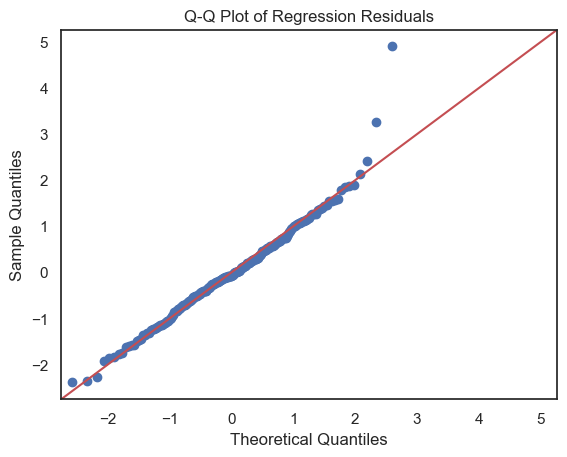

In [1372]:
# Q-Q plot of residuals
sm.qqplot(model1.resid, line='45', fit=True)
plt.title("Q-Q Plot of Regression Residuals")
plt.show()

### Most of the points lie along the 45° red line, indicating that the regression's residuals are approximately normally distributed.

### However, there are some deviation in the tails (especially top-right), which suggests slight skewness or potential outliers.

### But overall, normality seems mostly satisfied.

## Evaluate the model

In [1375]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 0.22471014217102828
Mean Square Error (Final): 0.09589834824580544


### <span style="color: orange;">  On average, the model's predictions for CPI percentage change deviate from the actual values by about 0.224 percent (MAE). On the other hand, the average of the squared prediction errors is approximately 0.0958 percent (MSE).

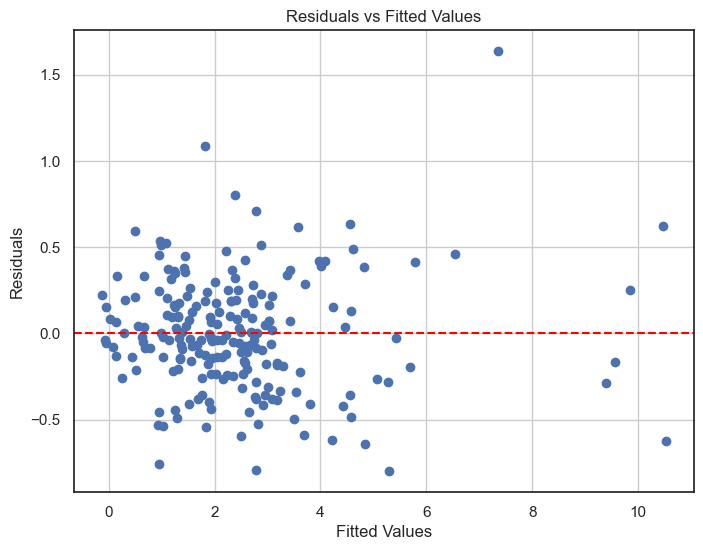

In [1377]:
plt.figure(figsize=(8, 6))
plt.scatter(model1.fittedvalues, model1.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()

### Observations:

Non-constant spread: Residuals fan out slightly as fitted values increase.

### This suggests heteroscedasticity as the variance of the residuals is not constant across the range of predicted values.

Residuals are more tightly clustered at lower predicted values and more dispersed at higher values.

No strong nonlinearity: There's no clear curve or wave pattern, which implies the model's linear form is likely appropriate (good news!).

## Multiple linear regression: Drop Consumer Confidence, FTSE250 and BoE base rate as variables and explore transformation of dependent variable (if possible)

# Re-perform MLR without confidence score and BoE base rate as independent variables. Transformation of dependent variable not straight forward as it contains negative numbers

In [1381]:
# Define the dependent variable
y = regression_df['CPI_pct_change (t=x)']

# Define the independent variable(s)
X = regression_df[
    ['CPI_pct_change (t=x-1)', 'wage_growth_rate (t=x-3)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [1382]:
# Call the predictions for X (array).
mlr.predict(X)

array([ 1.85198988,  1.85615484,  1.50444438,  1.92896537,  1.40664407,
        1.30884375,  0.88015779,  1.18605364,  1.68755013,  1.56892499,
        1.55226513,  1.42531006,  0.80518843,  0.60125787,  1.12357917,
        1.03827375,  1.04243871,  1.44196992,  1.53560527,  1.72704094,
        1.31501485,  1.61258077,  1.49812059,  1.38366041,  1.30668492,
        1.11108428,  1.32750974,  1.40448524,  1.40448524,  1.41281517,
        1.32750974,  1.3441696 ,  1.45446481,  1.36082946,  1.19854854,
        1.19021861,  1.58974981,  1.65006545,  1.46279474,  1.36499442,
        1.15689889,  1.25886417,  1.56476002,  1.77285555,  1.67089027,
        1.77702052,  1.97678612,  1.99344598,  1.98928101,  2.09541126,
        2.38881222,  2.49910743,  2.60523767,  2.40963704,  2.2140364 ,
        2.00177591,  1.99761094,  2.0912463 ,  1.87482084,  2.08708133,
        2.31183672,  2.63439243,  2.51993225,  2.61773257,  2.51993225,
        2.50743736,  2.78834342,  3.0900743 ,  2.79250838,  2.92

In [1383]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.9630059730631764
Intercept:  -0.13548276804997217
Coefficients:


[('CPI_pct_change (t=x-1)', 1.0196528299818097),
 ('wage_growth_rate (t=x-3)', 0.04164964520203455)]

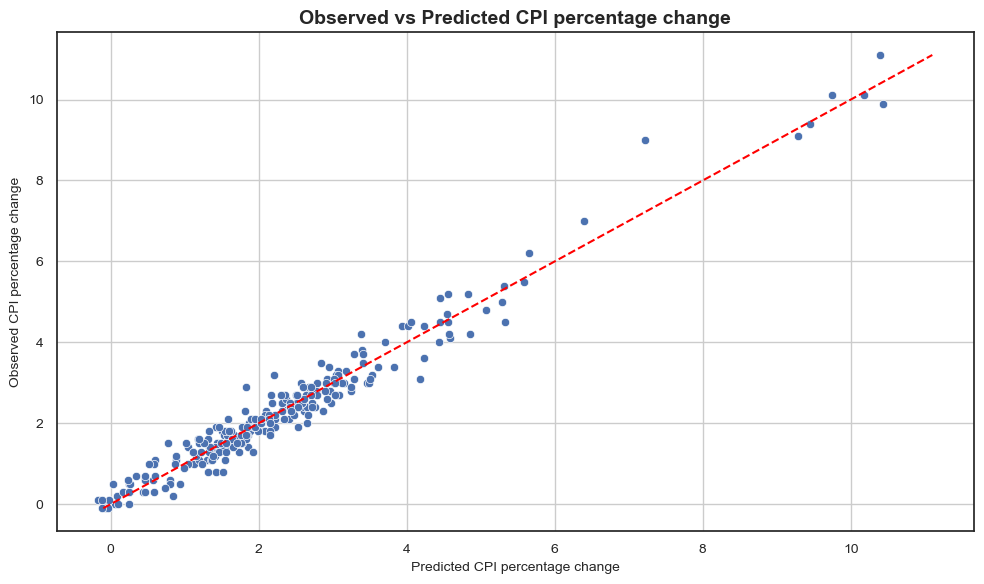

In [1384]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['CPI_pct_change (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted CPI percentage change', fontsize=10)
plt.ylabel('Observed CPI percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted CPI percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

### Training and testing subsets with MLR

In [1386]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [1387]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model3 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model3.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model3.summary()

# Print the summary.
print(print_model)  

                             OLS Regression Results                             
Dep. Variable:     CPI_pct_change (t=x)   R-squared:                       0.963
Model:                              OLS   Adj. R-squared:                  0.963
Method:                   Least Squares   F-statistic:                     2675.
Date:                  Fri, 16 May 2025   Prob (F-statistic):          1.35e-147
Time:                          10:24:13   Log-Likelihood:                -72.710
No. Observations:                   208   AIC:                             151.4
Df Residuals:                       205   BIC:                             161.4
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cons

### Similar R-squared and adj. R-square as before, which is great, however there is still signs of strong heteroskedasticity

In [1389]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                  features
0         5.0                     const
1         1.1    CPI_pct_change (t=x-1)
2         1.1  wage_growth_rate (t=x-3)


### No multicollinearity observed from the VIF output

In [1391]:
# Determine heteroscedasticity.
model4 = sms.het_breuschpagan(model3.resid, model3.model.exog)

In [1392]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': 22.489294908093946, 'LM Test p-value': 0.00042252624905979877, 'F-stat': 4.897655441700096, 'F-test p-value': 0.0002979399840427355}


### Very small p-value: strong evidence against the null hypothesis of homoskedasticity.

# Note to self: tried to log transform the dependent variable BUT didn't work because CPI dataset contains negative numbers

# Given that the homoskedasticity assumption of MLR does not hold, these could lead to inconsistent / inaccurate hypothesis testing and variable significance interpretations, therefore multiple linear regression is likely not the best ML model to describe inflation. We will explore Random Forest / XGBoost next

In [1395]:
regression_df.describe()

,Date,CPI_pct_change (t=x),CPI_pct_change (t=x-1),confidence_score (t=x),wage_growth_rate (t=x-3),ftse_250_total_return (t=x-3),BoE_base_rate (t=x-3)
count,260,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,2012-02-17 10:25:50.769230848,2.339231,2.303077,-12.857692,3.034231,8707.318473,1.894656
min,2001-06-01 00:00:00,-0.100000,-0.100000,-49.000000,-2.900000,1934.619995,0.175000
25%,2006-10-24 06:00:00,1.400000,1.400000,-22.250000,1.900000,4409.935000,0.336376
50%,2012-03-16 12:00:00,2.050000,2.000000,-9.000000,2.850000,7102.665000,0.477580
75%,2017-06-08 12:00:00,2.900000,2.825000,-3.000000,4.300000,13053.908160,4.000000
max,2022-10-01 00:00:00,11.100000,10.100000,7.000000,8.900000,19395.493530,5.750000
std,NaN,1.742540,1.655408,12.423936,1.768564,4910.856968,2.026963


In [1396]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 139 to 398
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           260 non-null    datetime64[ns]
 1   CPI_pct_change (t=x)           260 non-null    float64       
 2   CPI_pct_change (t=x-1)         260 non-null    float64       
 3   confidence_score (t=x)         260 non-null    float64       
 4   wage_growth_rate (t=x-3)       260 non-null    float64       
 5   ftse_250_total_return (t=x-3)  260 non-null    float64       
 6   BoE_base_rate (t=x-3)          260 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 16.2 KB


In [1397]:
regression_df.head()

,Date,CPI_pct_change (t=x),CPI_pct_change (t=x-1),confidence_score (t=x),wage_growth_rate (t=x-3),ftse_250_total_return (t=x-3),BoE_base_rate (t=x-3)
139,2001-06-01,1.7,1.7,6.0,6.1,2802.949951,5.625000
140,2001-07-01,1.4,1.7,4.0,6.2,2958.949951,5.500000
141,2001-08-01,1.8,1.4,0.0,5.1,3044.310059,5.250000
142,2001-09-01,1.3,1.8,-1.0,5.5,2925.889893,5.166667
143,2001-10-01,1.2,1.3,-5.0,5.2,2830.649902,5.083333


Root Mean Squared Error: 0.3460
Mean Squared Error: 0.1197
Mean Absolute Error: 0.2513
R² Score: 0.9423


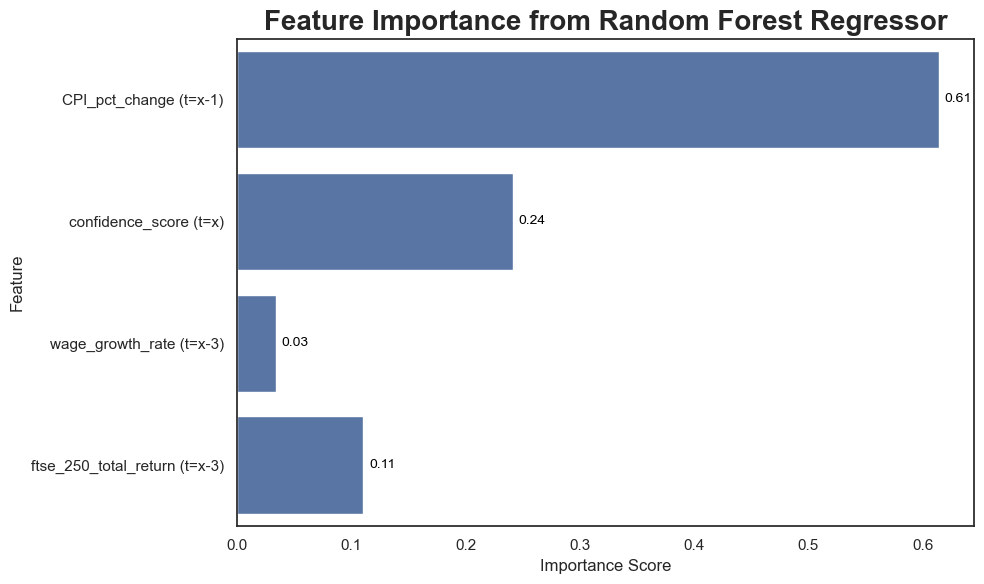

In [1398]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas

# 1. Prepare the data
# -------------------
# Use only non-null rows
regression_df = regression_df.dropna(
    subset=[
        'CPI_pct_change (t=x)',
        'CPI_pct_change (t=x-1)',
        'confidence_score (t=x)',
        'wage_growth_rate (t=x-3)',
        'ftse_250_total_return (t=x-3)',
    ]
)

# Define features and target
X = regression_df[
    [
        'CPI_pct_change (t=x-1)',
        'confidence_score (t=x)',
        'wage_growth_rate (t=x-3)',
        'ftse_250_total_return (t=x-3)',
    ]
]
y = regression_df['CPI_pct_change (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Build and train the Random Forest model
# ------------------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
)

rf_model.fit(X_train, y_train)

# 4. Predictions and Evaluation
# -----------------------------
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Feature Importance Plot
# --------------------------
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importances, y=feature_importances.index)  # Save the axes object
plt.title(
    "Feature Importance from Random Forest Regressor", fontsize=20, fontweight='bold'
)
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importances, feature_importances.index)):
    ax.text(
        value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10
    )  # Use the saved 'ax'
plt.tight_layout()
plt.show()

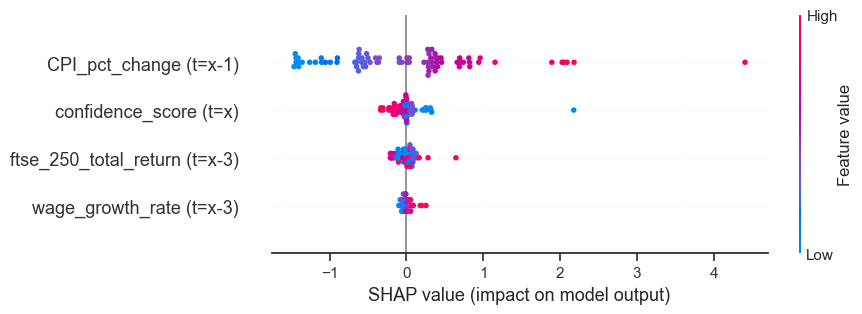

In [1459]:
!pip install shap
import shap

explainer_rf = shap.Explainer(rf_model, X_test)
shap_values_rf = explainer_rf(X_test)
shap.plots.beeswarm(shap_values_rf)

Root Mean Squared Error: 0.3190
Mean Squared Error: 0.1018
Mean Absolute Error: 0.2427
R² Score: 0.9509


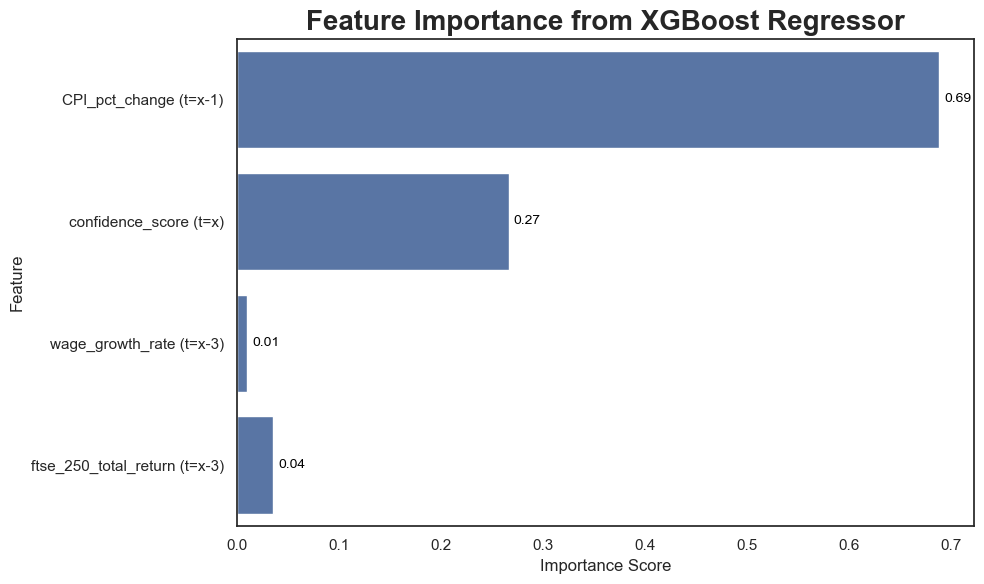

In [1399]:
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare the data
# -------------------
# Drop missing values
regression_df = regression_df.dropna(subset=[
    'CPI_pct_change (t=x)', 'CPI_pct_change (t=x-1)',
    'confidence_score (t=x)', 'wage_growth_rate (t=x-3)',
    'ftse_250_total_return (t=x-3)'
])

# Features and target
X = regression_df[['CPI_pct_change (t=x-1)',
                   'confidence_score (t=x)',
                   'wage_growth_rate (t=x-3)',
                   'ftse_250_total_return (t=x-3)']]
y = regression_df['CPI_pct_change (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 3. Initialize and train XGBoost model
# -------------------------------------
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',  # use squared error for regression
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 4. Predict and evaluate
# -----------------------
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
# 5. Plot feature importance
# --------------------------
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance, y=feature_importance.index)

plt.title("Feature Importance from XGBoost Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importance, feature_importance.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

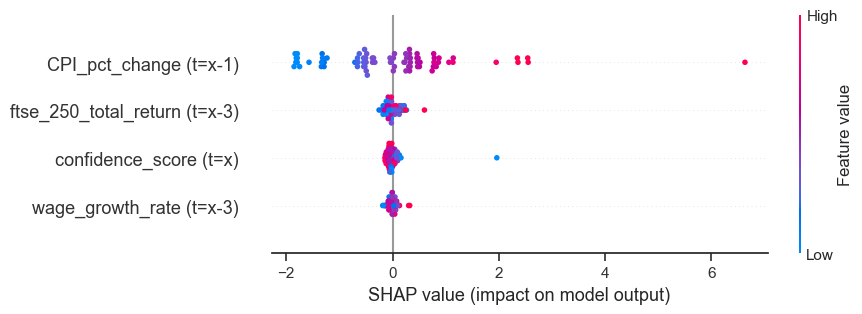

In [1457]:
explainer = shap.Explainer(xgb_model, X_test)
shap_values = explainer(X_test)

# Summary plot (shows magnitude + direction)
shap.plots.beeswarm(shap_values)

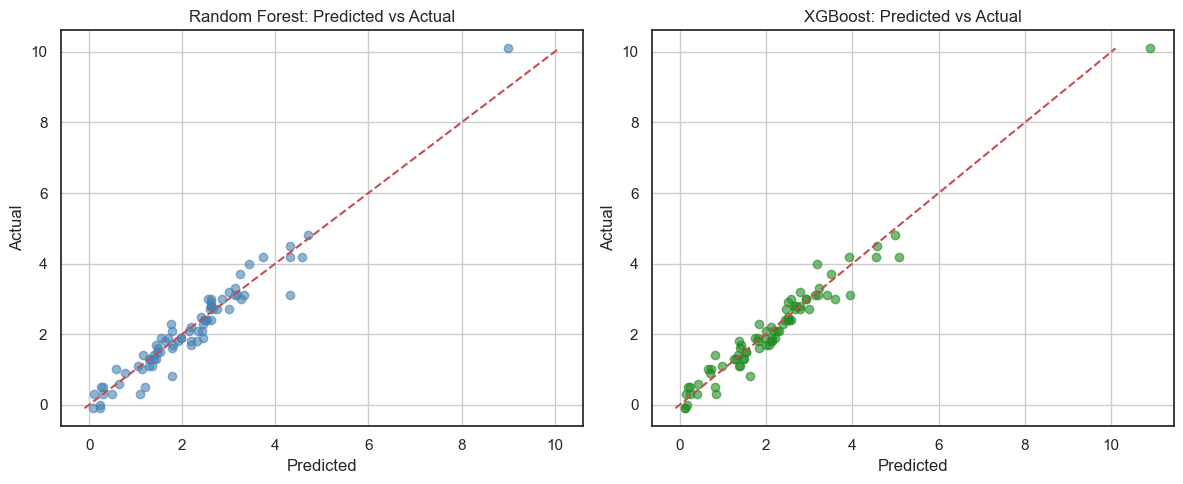

In [1400]:
# --- Random Forest Predictions ---
rf_preds = rf_model.predict(X_test)

# --- XGBoost Predictions ---
xgb_preds = xgb_model.predict(X_test)

# --- Plot Predictions vs Actuals ---
plt.figure(figsize=(12, 5))

# Random Forest subplot
plt.subplot(1, 2, 1)
plt.scatter(rf_preds, y_test, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest: Predicted vs Actual")
plt.grid(True)

# XGBoost subplot
plt.subplot(1, 2, 2)
plt.scatter(xgb_preds, y_test, alpha=0.6, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost: Predicted vs Actual")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Both Random Forest and XGBoost models exhibit strong performance in predicting the CPI Percentage Change, with Random Forest slightly outperforming XGBoost across all evaluation metrics. The Random Forest model achieved an R² score of 0.9423, a mean absolute error (MAE) of 0.2513, and a mean squared error (MSE) of 0.1197. In comparison, XGBoost produced an R² score of 0.9509, MAE of 0.2427, and MSE of 0.1018. The prediction plots further support this, as Random Forest's predicted values align more closely with the actual values, showing fewer outliers and tighter clustering along the ideal reference line. While both models are reliable and capture the underlying patterns well, XGBoost demonstrates slightly greater accuracy and consistency on this dataset.